In [52]:
import numpy as np
from scipy.linalg import expm
import afqmc
import importlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time


importlib.reload(afqmc)
from afqmc import *

In [53]:
# 使用例
U = 4
mu = U / 2
L = 20
N = 10
dimension = 2
size = N**dimension
# s = -np.ones((L, size))
# sはL×Nの行列で、要素は1か-1
s = np.random.choice([-1, 1], size=(L, size))
p = {
    "N": N,
    "L": L,
    "beta": 3,
    "t": 1.0,
    "U": U,
    "mu": mu,
    "s": s,
    "dimension": dimension,
}

In [54]:
n_stab = 1
M = 100
Szz_beta = []
Sxx_beta = []
afqmcs = []
for beta in range(6):
    Szz = np.zeros((N, N))
    Sxx = np.zeros((N, N))
    # Szz = np.zeros((N))
    p["beta"] = beta
    afqmc = AFQMC(**p)
    for m in range(M):
        print(beta, m)
        for l in reversed(range(L)):
            if l % n_stab == 0:
                afqmc.stabilize(l)
            afqmc.i_sweep(l)
            afqmc.time_update_green_function(l)
        if m > 3:
            Szz += np.array(
                [[afqmc.make_Szz_2d(i, j) for i in range(N)] for j in range(N)]
            )
            Sxx += np.array(
                [[afqmc.make_Sxx_2d(i, j) for i in range(N)] for j in range(N)]
            )
            # Szz += np.array([afqmc.make_Szz_1d(i) for i in range(N)])
    afqmcs.append(afqmc)
    Szz /= M - 4
    Szz_beta.append(Szz)
    Sxx /= M - 4
    Sxx_beta.append(Sxx)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


KeyboardInterrupt: 

In [ ]:
for beta in range(6):
    print(np.trace(afqmcs[beta].G_up[0]))

50.0
48.9537551620523
50.81866231118435
54.73449070214762
49.57715606633759
50.04674610569749


0
1
2
3
4
5


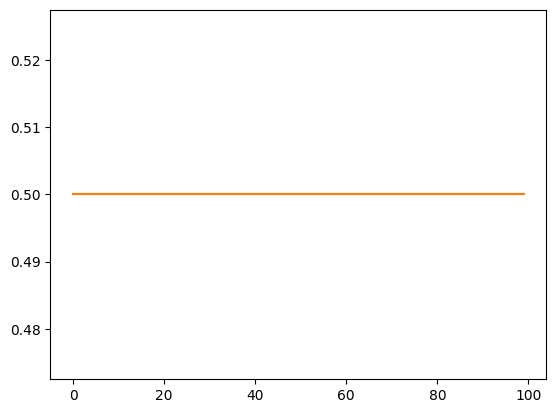

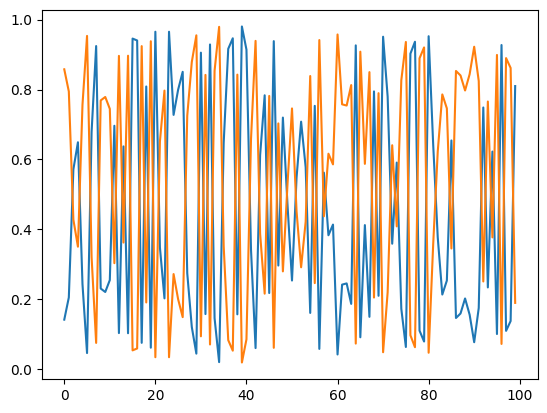

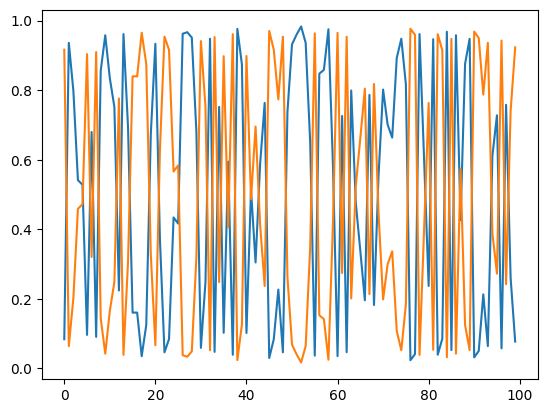

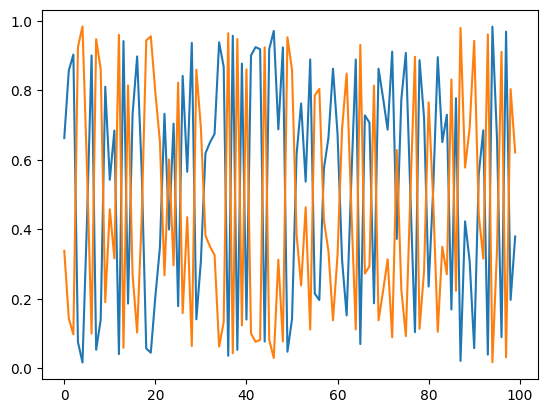

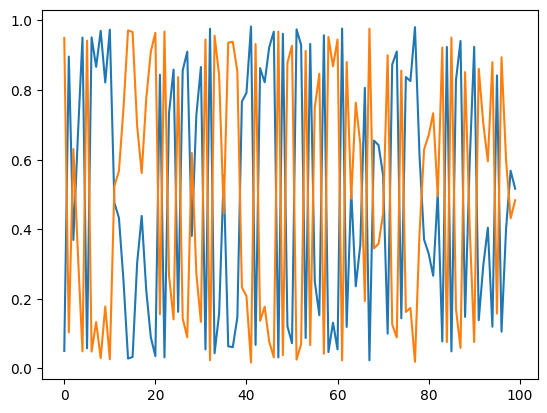

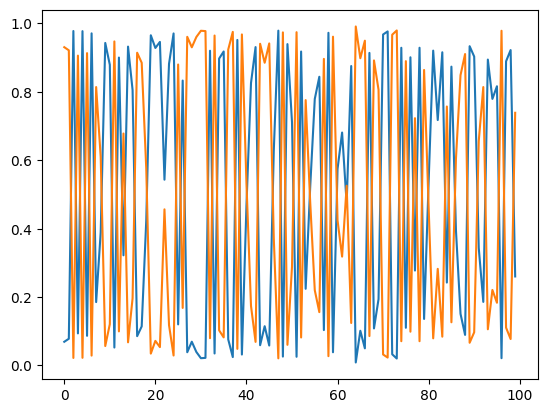

In [ ]:
for beta in range(6):
    print(beta)
    fig, ax = plt.subplots()
    ax.plot(np.diag(afqmcs[beta].G_up[L // 2]))
    ax.plot(np.diag(afqmcs[beta].G_dn[L // 2]))

In [ ]:
Szz_pipi_beta = [afqmc.make_S_pipi(Szz) for Szz in Szz_beta]
Sxx_pipi_beta = [afqmc.make_S_pipi(Sxx) for Sxx in Sxx_beta]

In [ ]:
Szz_pipi_beta

[0.5,
 1.0645499703730166,
 1.5117600815500456,
 1.9471572155209018,
 2.6607635917448724,
 7.835587896414218]

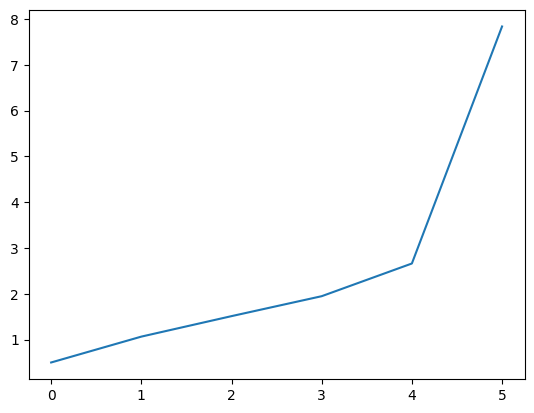

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(6), Szz_pipi_beta)

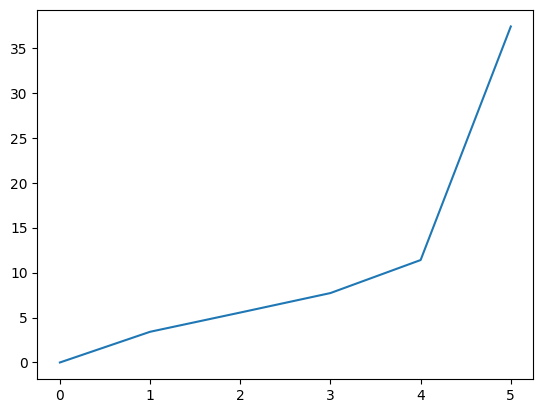

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(6), Sxx_pipi_beta)